In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data.shape

(42000, 785)

In [84]:
data = np.array(data)
data.shape

(42000, 785)

In [85]:
# split the data
np.random.shuffle(data)

m, n = data.shape

X, y = data[:, 1:], data[:, 0]

X_hold = X[:1000].T
X_hold = X_hold / 255.
y_hold = y[:1000]

X_train = X[1000:].T
X_train = X_train / 255.
y_train = y[1000:]

X_train.shape, y_train.shape, X_hold.shape, y_hold.shape

((784, 41000), (41000,), (784, 1000), (1000,))

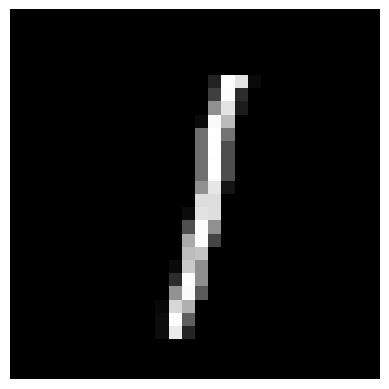

In [86]:
plt.axis("off")
plt.imshow(X_train[:, 0].reshape((28, 28)), cmap="gray");

In [99]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(8, 10) - 0.5
  b2 = np.random.rand(8, 1) - 0.5
  W3 = np.random.rand(10, 8) - 0.5
  b3 = np.random.rand(10, 1) - 0.5

  return W1, b1, W2, b2, W3, b3

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A

def forward_prop(W1, b1, W2, b2, W3, b3, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = ReLU(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)

  return Z1, A1, Z2, A2, Z3, A3

def one_hot_encoder(y):
  Y = np.zeros((y.size, y.max() + 1))
  Y[np.arange(y.size), y] = 1

  return Y.T

def derivative_relu(Z):
  return Z > 0

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W3, W2, X, y):
  Y = one_hot_encoder(y)
  dZ3 = A3 - Y
  dW3 = 1 / m * dZ3.dot(A2.T)
  db3 = 1 / m * np.sum(dZ3)

  dZ2 = derivative_relu(Z2) * W3.T.dot(dZ3)
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)

  dZ1 = derivative_relu(Z1) * W2.T.dot(dZ2)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)

  return dW1, db1, dW2, db2, dW3, db3


def apply_gradient(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  W3 = W3 - alpha * dW3
  b3 = b3 - alpha * db3

  return W1, b1, W2, b2, W3, b3

def predict(A):
  return np.argmax(A, 0)

def get_accuracy(pred, y):
  print(pred, y)
  return np.sum(pred == y) / y.size

def gradient_descent(X, y, iterations=500, alpha=0.1):
  W1, b1, W2, b2, W3, b3 = init_params()

  for i in range(iterations):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3,
                                                 A3, W3, W2, X, y)
    W1, b1, W2, b2, W3, b3 = apply_gradient(W1, b1, W2, b2, W3, b3, dW1, db1,
                                            dW2, db2, dW3, db3, alpha)

    if i % 10 == 0:
      pred = predict(A3)
      print(f"Iteration {i} with accuracy {get_accuracy(pred, y)}")

  return W1, b1, W2, b2, W3, b3


W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, y_train)

[5 5 0 ... 5 9 5] [1 1 3 ... 7 7 4]
Iteration 0 with accuracy 0.086
[5 5 5 ... 4 9 0] [1 1 3 ... 7 7 4]
Iteration 10 with accuracy 0.1664878048780488
[5 5 5 ... 4 9 1] [1 1 3 ... 7 7 4]
Iteration 20 with accuracy 0.20924390243902438
[6 1 5 ... 4 9 6] [1 1 3 ... 7 7 4]
Iteration 30 with accuracy 0.25226829268292683
[6 1 3 ... 4 9 6] [1 1 3 ... 7 7 4]
Iteration 40 with accuracy 0.3064390243902439
[1 1 3 ... 4 9 8] [1 1 3 ... 7 7 4]
Iteration 50 with accuracy 0.3717560975609756
[1 1 3 ... 4 9 8] [1 1 3 ... 7 7 4]
Iteration 60 with accuracy 0.4444878048780488
[1 1 3 ... 7 9 8] [1 1 3 ... 7 7 4]
Iteration 70 with accuracy 0.49402439024390243
[1 1 3 ... 7 9 8] [1 1 3 ... 7 7 4]
Iteration 80 with accuracy 0.5336585365853659
[1 1 3 ... 7 9 8] [1 1 3 ... 7 7 4]
Iteration 90 with accuracy 0.5658048780487804
[1 1 3 ... 7 9 8] [1 1 3 ... 7 7 4]
Iteration 100 with accuracy 0.5894146341463414
[1 1 3 ... 7 9 8] [1 1 3 ... 7 7 4]
Iteration 110 with accuracy 0.6098780487804878
[1 1 3 ... 7 9 9] [1 1 3 

In [108]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = predict(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_hold[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2, W3, b3)
    label = y_hold[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28))
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


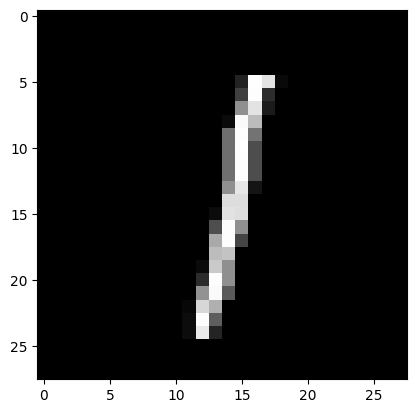

Prediction:  [1]
Label:  1


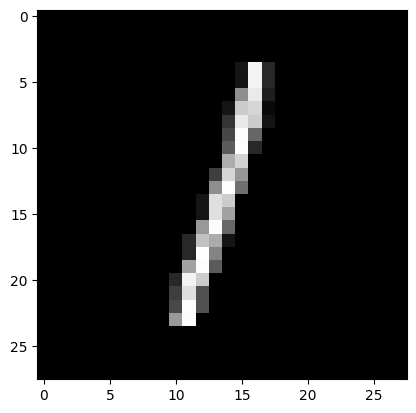

Prediction:  [3]
Label:  3


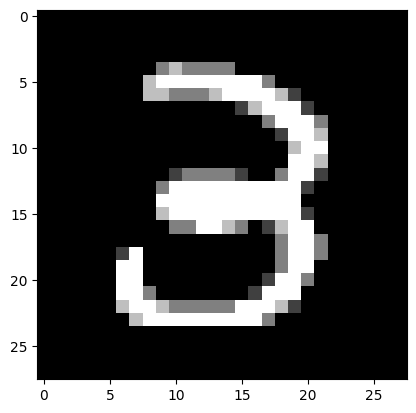

Prediction:  [4]
Label:  5


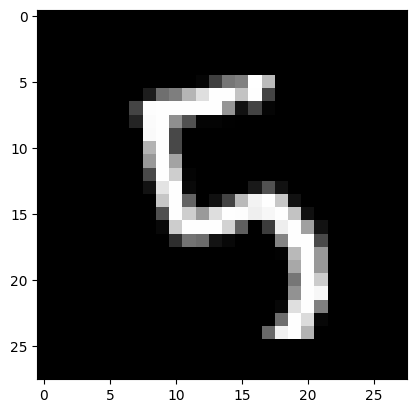

Prediction:  [5]
Label:  5


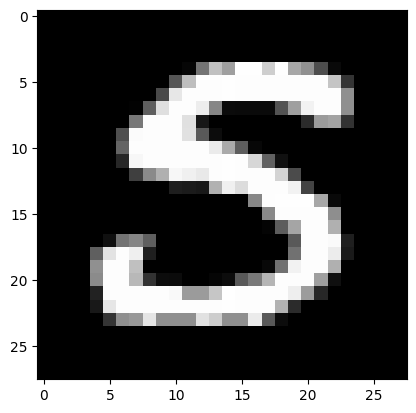

Prediction:  [9]
Label:  9


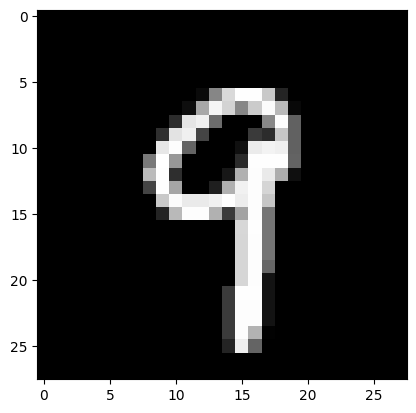

Prediction:  [0]
Label:  0


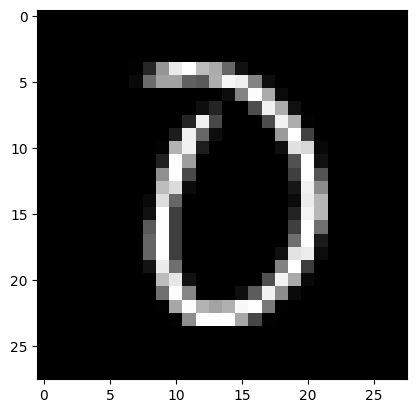

Prediction:  [5]
Label:  5


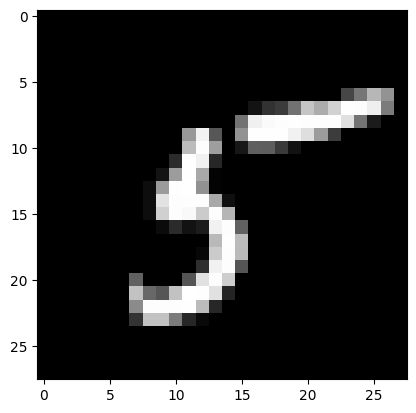

Prediction:  [3]
Label:  3


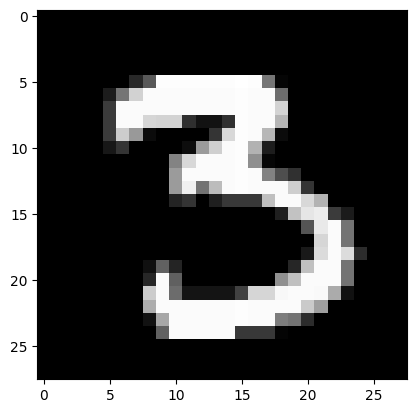

In [109]:
for i in range(9):
  test_prediction(i, W1, b1, W2, b2, W3, b3)